### 0. Описание задачи

Датасет состоит из данных о красных и белых винах Винью Верде с севера Португалии.
Цель задачи состоит в том, чтобы определить качество вина(от 0 до 10) на основе физико-химических тестов.

Вино имеет следующие признаки:

1 - **Тип вина(type)**: 

2 - **Фиксированная кислотность(fixed acidity)**: большинство кислот, связанных с вином, которые не испаряются быстро

3 - **Летучая кислотность(volatile acidity)**: количество уксусной кислоты в вине, слишком высокое содержание которой может привести к неприятному вкусу уксуса

4 - **Лимонная кислота(citric acid)**: в небольших количествах лимонная кислота может придавать винам «свежесть» и аромат

5 - **Остаточный сахар(residual sugar)**: количество сахара, остающегося после остановки брожения

6 - **Хлориды(chlorides)**: количество соли в вине

7 - **Количество диоксида серы свободной формы(free sulfur dioxide)**: предотвращает рост микробов и окисление вина

8 - **Общее количество диоксида серы(total sulfur dioxide)**: в низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрациях свободного SO2 более 50 частей на миллион SO2 становится заметным в носу и вкусе вина.

9 - **Плотность(density)**

10 - **pH**: описывает степень кислотности или щелочности вина по шкале от 0 (очень кислая) до 14 (очень щелочная). У большинства вин уровень pH составляет 3-4.

11 - **Сульфаты(sulfates)**: добавка, которая может способствовать повышению уровня газообразного диоксида серы

12 - **Алкоголь(alcohol)**: процентное содержание алкоголя в вине

И то, что мы будем предсказывать:

13 - **Качество вина(quality)**

### 1. Чтение данных:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
path = './winequalityN.csv'
data = pd.read_csv(path)

### 2. Визуализация данных и вычисление основных характеристик:

In [3]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Информация о количественных признаках:

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Минимальное качество вина - 3, а максимальное 9. В датасете отсутствуют данные о винах, которые имеют качества 0, 1, 2, 3

Среднее качество вин: 5.82, разброс 0.87, это говорит о том, что большинство вин имеет качество 5 или 6


Информация о категориальных признаках:

In [5]:
data.describe(include = ['object'])

,type
count,6497
unique,2
top,white
freq,4898


В датасете белого вина больше, чем красного

Вычислим матрицу корреляции и визуализируем ее:

In [6]:
corr_mat = data.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


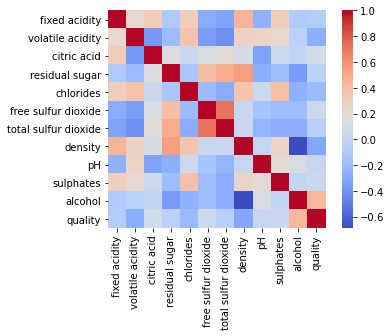

In [7]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Интересно посмотреть с чем коррелирует целевой признак: есть корреляция(0.44) между качеством вина и процентным содержанием алкоголя, а также несильную отрицательную корреляцию у качества вина и такими признаками, как плотность, хлориды и фиксированная кислотность.

**Найдем сильно коррелирующие признаки (с корреляцией > 0.5):**

In [8]:
corr_mat > 0.5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,False,True,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,True,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,True,True,False,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


In [9]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

free sulfur dioxide  total sulfur dioxide    0.720934
residual sugar       density                 0.552498
dtype: float64

Наблюдается значительная корреляция между количеством SO2 свободной формы и общим количеством SO2, она равна 0.72. Такая корреляция может быть объяснена тем, что в большинстве случаев увеличение числа SO2 в свободной форме приводит к увеличению общего числа SO2(т.е. число связанных форм SO2 в среднем при этом не уменьшается).

Также есть корреляция между плотностью и остаточным сахаром

В остальных случаях значительной корреляции между признаками не наблюдается

**В матрице корреляции также наблюдаются отрицательные значения, найдем признаки с корреляцией < -0.5**

In [10]:
corr_mat < -0.5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,False,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,False,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,False,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,False,False,False,False,False,False,False,False,False
chlorides,False,False,False,False,False,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,False,False,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,False,False,False,False,False,False,False
density,False,False,False,False,False,False,False,False,False,False,True,False
pH,False,False,False,False,False,False,False,False,False,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
corr_mat.where(np.triu(corr_mat < -0.5, k=1)).stack().sort_values(ascending=False)

density  alcohol   -0.686745
dtype: float64

Между признаками процентного содержания алкоголя и плотности есть сильная отрицательная корреляция: -0.69. Это говорит о том, что чем больше содержания алкоголя, тем меньше плотность.

Теперь стало понятно, почему у плотности и качества вина отрицательная корреляция, хоть и небольшая - между признаками качество и процентное содержание алкоголя положительная корреляция, в то же время у процентного содержания алкоголя и плотности отрицательная корреляция.

### 3. Обработатка пропущенных значений

В датасете есть пропущенные значения:

In [12]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Попробуем сделать две вещи:

Исключить строки с пропущенными значениями(так как количество пропущенных значений невелико)

Заполнить пропущенные значения медианами

**Датасет без строчек с пропущенными значениями "dataWONan":**

In [13]:
dataWONan = (data.dropna()).copy()
dataWONan

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Датасет стал меньше на 34 строки

Теперь пропущенных значений нет:

In [14]:
dataWONan.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Датасет, у которого пропущенные значения заменили медианами "dataWMed":**

In [15]:
dataWMed = data.copy()
dataWMed['fixed acidity'].fillna(dataWMed['fixed acidity'].median(axis = 0), inplace = True)
dataWMed['volatile acidity'].fillna(dataWMed['volatile acidity'].median(axis = 0), inplace = True)
dataWMed['citric acid'].fillna(dataWMed['citric acid'].median(axis = 0), inplace = True)
dataWMed['residual sugar'].fillna(dataWMed['residual sugar'].median(axis = 0), inplace = True)
dataWMed['chlorides'].fillna(dataWMed['chlorides'].median(axis = 0), inplace = True)
dataWMed['pH'].fillna(dataWMed['pH'].median(axis = 0), inplace = True)
dataWMed['sulphates'].fillna(dataWMed['sulphates'].median(axis = 0), inplace = True)
dataWMed

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Пропущенных значений нет:

In [16]:
dataWMed.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Далее сравним, какой датасет выбрать лучше

### 4. Обработатка категориальных признаков

В датасете имеется один категориальный признак(не считая целевого), и он бинарный. Это тип вина.

Бинарный признак `'type'` заменим на числовой. 

`'white'` → 0, `'red'`→ 1

In [17]:
dataWONan['type'] = pd.factorize(dataWONan['type'])[0]
dataWONan

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
dataWMed['type'] = pd.factorize(dataWMed['type'])[0]
dataWMed

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 5. Нормализация

Воспользуемся стандартизацией, так как диапазоны признаков большой

In [19]:
dataWONan_stand = (dataWONan.drop(['type', 'quality'], axis=1)).copy()
dataWONan_stand = (dataWONan_stand - dataWONan_stand.mean(axis = 0))/dataWONan_stand.std(axis = 0)
dataWONan_stand.join(dataWONan['type'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-0.167773,-0.422677,0.283937,3.207172,-0.315203,0.815546,0.960705,2.099764,-1.359055,-0.544945,-1.418813,0
1,-0.707100,-0.240460,0.146245,-0.808089,-0.201165,-0.930066,0.288457,-0.232447,0.508360,-0.276333,-0.832120,0
2,0.679741,-0.361938,0.559320,0.306094,-0.172655,-0.029105,-0.330719,0.134043,0.259371,-0.612098,-0.329240,0
3,-0.013680,-0.665632,0.008554,0.642451,0.055422,0.928166,1.243757,0.300630,-0.176359,-0.880711,-0.496866,0
4,-0.013680,-0.665632,0.008554,0.642451,0.055422,0.928166,1.243757,0.300630,-0.176359,-0.880711,-0.496866,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-0.321867,1.703183,-1.643744,-0.745022,0.340519,-0.141725,-1.374473,0.603817,1.255326,1.939720,-0.832120,1
6492,-0.784147,1.581706,-1.643744,-0.723999,0.967732,0.083515,-1.268329,0.067408,1.442067,0.328046,0.006013,1
6494,-0.707100,1.035056,-1.299515,-0.660933,0.568596,-0.085415,-1.339092,0.347274,1.255326,1.469649,0.425080,1
6495,-1.015288,1.855030,-1.368361,-0.723999,0.540087,0.083515,-1.268329,0.257317,2.189033,1.201036,-0.245427,1


In [20]:
dataWONan_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03
mean,1.033581e-14,-3.842702e-15,3.475560e-14,-5.084591e-15,-7.831702e-15,2.769975e-16,1.680434e-15,1.643021e-12,1.963691e-14,-1.005199e-14,-4.359882e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.633270e+00,-1.576715e+00,-2.194510e+00,-1.018312e+00,-1.341551e+00,-1.662097e+00,-1.940577e+00,-2.528009e+00,-3.101975e+00,-2.089467e+00,-2.089319e+00
25%,-6.300537e-01,-6.656323e-01,-4.733664e-01,-7.660440e-01,-5.147708e-01,-7.611355e-01,-6.845343e-01,-7.888463e-01,-6.743362e-01,-6.792513e-01,-8.321195e-01
50%,-1.677731e-01,-3.011992e-01,-6.029195e-02,-5.137764e-01,-2.581838e-01,-8.541478e-02,4.078616e-02,6.407665e-02,-5.186461e-02,-1.420263e-01,-1.616132e-01
75%,3.715542e-01,3.669283e-01,4.904739e-01,5.583613e-01,2.549901e-01,5.903060e-01,7.130344e-01,7.670717e-01,6.328541e-01,4.623518e-01,6.765196e-01
max,6.689389e+00,7.534114e+00,9.233882e+00,1.268823e+01,1.582127e+01,1.455520e+01,5.737206e+00,1.475368e+01,4.927908e+00,9.863789e+00,3.693798e+00


In [21]:
dataWMed_stand = (dataWMed.drop(['type', 'quality'], axis=1)).copy()
dataWMed_stand = (dataWMed_stand - dataWMed_stand.mean(axis = 0))/dataWMed_stand.std(axis = 0)
dataWMed_stand.join(dataWMed['type'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-0.166885,-0.423135,0.284251,3.206758,-0.315115,0.815503,0.959902,2.102052,-1.359485,-0.545826,-1.418449,0
1,-0.707100,-0.240828,0.146539,-0.807883,-0.200930,-0.931035,0.287595,-0.232314,0.508077,-0.276953,-0.831551,0
2,0.682025,-0.362366,0.559673,0.306127,-0.172384,-0.029596,-0.331634,0.134515,0.259069,-0.613044,-0.328496,0
3,-0.012538,-0.666213,0.008828,0.642432,0.055985,0.928182,1.242978,0.301255,-0.176695,-0.881917,-0.496181,0
4,-0.012538,-0.666213,0.008828,0.642432,0.055985,0.928182,1.242978,0.301255,-0.176695,-0.881917,-0.496181,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784274,1.582251,-1.643707,-0.723807,0.969462,0.083083,-1.269324,0.067819,1.441858,0.328011,0.006874,1
6493,-1.015795,1.278404,-1.505996,-0.681769,0.170170,0.477463,-1.145479,0.141185,1.877623,-0.142517,0.593772,1
6494,-0.707100,1.035327,-1.299429,-0.660750,0.569816,-0.085936,-1.340094,0.347943,1.255102,1.470720,0.426087,1
6495,-1.015795,1.855712,-1.368285,-0.723807,0.541270,0.083083,-1.269324,0.257903,2.188883,1.201847,-0.244653,1


In [22]:
dataWMed_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,1.112527e-14,-4.203912e-15,3.766614e-14,-3.644366e-15,-7.364195e-15,-1.210787e-15,4.524966e-17,1.736706e-12,2.695783e-14,-7.941709e-15,-4.818722e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.636441e+00,-1.577752e+00,-2.194552e+00,-1.018074e+00,-1.342776e+00,-1.663455e+00,-1.941631e+00,-2.529997e+00,-3.102543e+00,-2.091845e+00,-2.089189e+00
25%,-6.299267e-01,-6.662125e-01,-4.731613e-01,-7.658452e-01,-5.149380e-01,-7.620156e-01,-6.854795e-01,-7.858922e-01,-6.747121e-01,-6.802623e-01,-8.315512e-01
50%,-1.668849e-01,-3.015969e-01,-6.002746e-02,-5.136164e-01,-2.580226e-01,-8.593639e-02,3.990360e-02,6.448391e-02,-5.219133e-02,-1.425167e-01,-1.608107e-01
75%,3.733306e-01,3.668652e-01,4.908177e-01,5.583559e-01,2.558082e-01,5.901428e-01,7.122099e-01,7.647937e-01,6.325815e-01,4.624472e-01,6.776148e-01
max,6.701569e+00,7.537640e+00,9.235485e+00,1.268636e+01,1.584201e+01,1.456245e+01,5.736815e+00,1.476765e+01,4.927975e+00,9.872995e+00,3.695947e+00


### 6. Разобьем данные на тестовую и обучающую выборки

In [23]:
XWONan = dataWONan_stand
yWONan = dataWONan['quality']

In [24]:
XWONan_train, XWONan_test, yWONan_train, yWONan_test = train_test_split(XWONan, yWONan, test_size = 0.15, random_state = 404)

In [25]:
XWMed = dataWMed_stand
yWMed = dataWMed['quality']

In [26]:
XWMed_train, XWMed_test, yWMed_train, yWMed_test = train_test_split(XWMed, yWMed, test_size = 0.15, random_state = 404)

### 7. - 8. Запуск kNN и вычисление ошибок

Запустим классификатор ближайших соседей с разным количеством соседей(от 1 до 10)

Для обучения возьмем количество соседей, при котором ошибка кросс-валидации будет минимальной

In [27]:
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(XWONan_train, yWONan_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print("Лучшее количество соседей:", best_n_neighbors)
print("Ошибка кросс-валидации:", best_cv_err)

C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Лучшее количество соседей: 1
Ошибка кросс-валидации: 0.3826669978473256


In [28]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(XWONan_train, yWONan_train)

err_train = np.mean(yWONan_train != knn.predict(XWONan_train))
err_test  = np.mean(yWONan_test != knn.predict(XWONan_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.3494845360824742


Посмотрим на матрицу ошибок:

In [29]:
pd.DataFrame(confusion_matrix(yWONan_test, knn.predict(XWONan_test)), index = ['3', '4', '5', '6', '7', '8', '9'], columns = ['3', '4', '5', '6', '7', '8', '9'])

,3,4,5,6,7,8,9
3,0,1,3,0,0,0,0
4,0,9,16,8,1,0,0
5,1,13,214,74,11,1,0
6,1,7,72,282,47,10,0
7,0,0,9,42,115,4,0
8,0,0,2,6,9,11,0
9,0,0,0,0,0,1,0


In [30]:
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(XWMed_train, yWMed_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print("Лучшее количество соседей:", best_n_neighbors)
print("Ошибка кросс-валидации:", best_cv_err)

C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Лучшее количество соседей: 1
Ошибка кросс-валидации: 0.36599837513431344


In [31]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(XWMed_train,yWMed_train)

err_train = np.mean(yWMed_train != knn.predict(XWMed_train))
err_test  = np.mean(yWMed_test != knn.predict(XWMed_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.38871794871794874


**Вывод**

Оптимальное количество соседей - это один сосед

Ошибка на тестовой выборке у датасета с исключенными строками, в которых есть пропущенные значения меньше, чем у датасета, в котором пропущенные значения были заполнены медианами. Лучше исключить строки с пропущенными значениями, тем более их немного(34).

Ошибка на тестовой выборке довольно большая (0.349), это может быть объяснено тем, что качество вина определялось людьми на основе их ощущений, и их ощущения, предположительно, не связаны с большинством признаков датасета.

Наблюдается переобучение, оно возникло из-за того, что для классификатора ближайших соседей с одним соседом ошибка на обучающей выборке всегда равна 0, а ошибка на тестовой выборке достаточно велика.

Из матрицы ошибок видно, что качество 5 довольно часто классифицируется как 6, качество 6 часто классифицируется как 5 и 7, а качество 7 часто классифицируется как 6.

Так же на точность классификации могла отрицательно повлиять несбалансированность классов

**Выводы по повышению точности классификации написаны в пункте 12**

### 9. Другие классификаторы

### SVC

In [32]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(XWONan_train, yWONan_train)

err_train = np.mean(yWONan_train != svc.predict(XWONan_train))
err_test  = np.mean(yWONan_test  != svc.predict(XWONan_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.3921354451119607
Ошибка на тестовой выборке: 0.4298969072164949


### Random Forest

In [33]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(XWONan_train, yWONan_train)

err_train = np.mean(yWONan_train != rf.predict(XWONan_train))
err_test  = np.mean(yWONan_test  != rf.predict(XWONan_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.2865979381443299


### Extremely Randomized Trees

In [34]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(XWONan_train, yWONan_train)

err_train = np.mean(yWONan_train != ert.predict(XWONan_train))
err_test  = np.mean(yWONan_test  != ert.predict(XWONan_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.2824742268041237


### GBT

In [35]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(XWONan_train, yWONan_train)

err_train = np.mean(yWONan_train != gbt.predict(XWONan_train))
err_test = np.mean(yWONan_test != gbt.predict(XWONan_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.027489532131804113
Ошибка на тестовой выборке: 0.33298969072164947


### 12. Общие выводы



С помощью классификатора "Extremely Randomized Trees" удалось понизить ошибку на тестовой выборке до 0.282, переобучение сохранилось

Имеет смысл пересмотреть классы - в датасете отсутствуют данные о винах, качество которых равно 0, 1, 2 и 10. Вместо разбиения качества от 0 до 10, можно разбить уровни качества на плохое(0-4), хорошее(5-7) и отличное(8-10) это повысит точность классификации

Качество вина оценивалось людьми на основе их ощущений, а не строго на физико-химических свойствах самого вина. Несмотря на то, что некоторые свойства(признаки) отражаются во вкусе вина, они влияют на оценку качества опосредованно. Сильной корреляции(>0.8) между признаками и качеством вина не наблюдалось. Это тоже сказалось на небольшой точности классификации.

### 13. Обучение нейронной сети

Обучим на данных полносвязную, неглубокую нейронную сеть:

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
X_train = XWONan_train
y_train = yWONan_train
X_test = XWONan_test
y_test = yWONan_test

Сначала попробуем нейронную сеть с одним скрытым слоем:

In [57]:
mlp_model = MLPClassifier(hidden_layer_sizes = (101,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 404)

In [58]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(101,), max_iter=2000,
              random_state=404, solver='lbfgs')

In [59]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

##### Ошибки на обучающей и тестовой выборках при одном скрытом слое:

In [60]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.03648960739030023 0.4270979840600094


Затем используем нейронную сеть с двумя скрытыми слоями:

In [61]:
mlp_model = MLPClassifier(hidden_layer_sizes = (101,101,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 404)

In [62]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(101, 101),
              max_iter=2000, random_state=404, solver='lbfgs')

In [63]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

##### Ошибки на обучающей и тестовой выборках при двух срытых слоях:

In [64]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.4022503516174402


Увеличение числа слоев привело к уменьшению ошибки на обучающей выборке и на тестовой выборке.
В дальнейшем используется нейронная сеть с одним скрытым слоем.

##### Подберем оптимальное значение параметра регуляризации $\alpha$

In [65]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (101,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=2000, random_state = 404)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

##### Построим график зависимости ошибки на обучающей и тестовой выборках от параметра $\alpha$

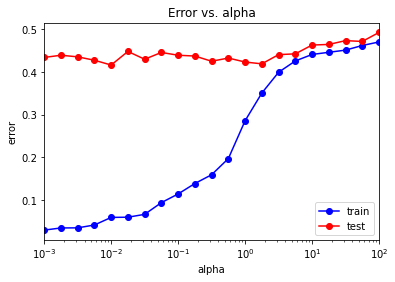

In [66]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [67]:
min_test_err = np.min(test_err)

##### Оптимальное значение $\alpha$:

In [68]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.01]


In [69]:
alpha_opt = alpha_opt[0]

Дальше будем использовать оптимальное значение $\alpha$

##### Построим график зависимости ошибки на обучающей и тестовой выборках от числа нейронов

In [70]:
ns = np.arange(21, 211, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for n in ns:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (n,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=2000, random_state = 404)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

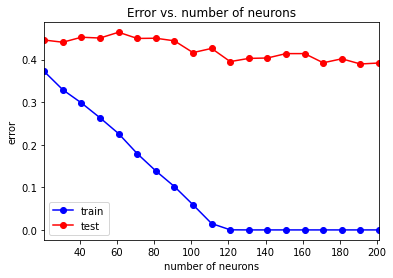

In [71]:
plt.plot(ns, train_err, 'b-o', label = 'train')
plt.plot(ns, test_err, 'r-o', label = 'test')
plt.xlim(21,201)
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()

С увеличением числа нейронов ошибка на тестовой и обучающей выборках уменьшается.

При увеличении числа нейронов, ошибка на обучающей выборке зануляется и можно наблюдать переобучение, так как при этом ошибка на тестовой выборке уменьшилась не так сильно.

При небольшом числе нейронов имеем недообучение нейронной сети.